安装代码：
```
pip install git+https://github.com/huggingface/transformers
```


In [1]:
import torch
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
from PIL import Image
import requests

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import requests
from PIL import Image
import torch
from transformers import AutoProcessor, LlavaForConditionalGeneration
import pandas as pd
import numpy as np

processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")
# model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")
cache_dir = "/data1/cehou_data/LLM_safety/LLM_model"
model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True, cache_dir=cache_dir) 
model.to("cuda:1")


GSV_metadata_path = '/data2/cehou/LLM_safety/GSV/GSV_metadata_sampled_5000.csv' # Hong Kong SVI
GSV_metadata = pd.read_csv(GSV_metadata_path)

def get_img(idx):
    GSV_name = GSV_metadata.iloc[idx]['panoid']
    GSV_list = [f"/data_nas/GoogleSV/images/China/HongKong/{GSV_name[0]}/{GSV_name[1]}/{GSV_name}_{angle}.jpg" for angle in range(0, 360, 90)]
    for i,path in enumerate(GSV_list):
        if i == 0:
            GSV_img = np.array(Image.open(GSV_list[0]))
        else:
            GSV_img = np.concatenate((GSV_img, np.array(Image.open(path))), axis=1)

    # visualization
    # plt.imshow(GSV_img)
    # plt.title('GSV from original dataset')
    # plt.axis('off')
    return GSV_img

Some kwargs in processor config are unused and will not have any effect: num_additional_image_tokens. 
Loading checkpoint shards: 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]


In [7]:
print(f"When evaluating the safety perception of car accidents, it is important to consider the sensitivity of different demographic groups to their environment. For {profile['gender']}, how will you evaluate the safety perception in this image according to the factors below? Here are some of the factors that people pay attention to when assessing street safety:\n\n1. Traffic Signs and Markings: The presence of clear and visible traffic signs, such as speed limits, stop signs, and yield signs, can significantly impact the perception of safety. Additionally, well-marked lanes, crosswalks, and pedestrian crossings can help drivers and pedestrians navigate the streets safely.\n\n2. Road Conditions: The condition of the road surface, including the presence of potholes, debris, or slippery surfaces, can affect the perception of safety. Well-maintained roads with minimal hazards are generally perceived as safer.\n\n3. Traffic Volume: The level of traffic on the streets can impact the perception of safety. High traffic volumes can increase the risk of accidents, while low traffic volumes can make the streets feel safer.\n\n4. Pedestrian Infrastructure: The presence of sidewalks, pedestrian crossings, and well-lit areas can make pedestrians feel safer when navigating the streets.\n\n5. Vehicle Types and Speeds: The types of vehicles on the road and their speeds can impact the perception of safety. For example, a high volume of large vehicles, such as trucks or buses, can make the streets feel less safe due to their size and potential blind spots.\n\n6. Road Design: The design of the road, including the presence of curves, intersections, and merging lanes, can impact the perception of safety. Roads with clear sightlines and well-designed intersections are generally perceived as safer.\n\n7. Street Lighting: Adequate street lighting can improve visibility and reduce the risk of accidents. Poorly lit streets can make drivers and pedestrians feel less safe.\n\n8. Roadside Vegetation: The presence of trees, bushes, and other vegetation along the roadside can impact the perception of safety. Well-maintained vegetation can provide a sense of separation between the road and adjacent properties, while overgrown vegetation can obstruct visibility and make the streets feel less safe.\n\n9. Traffic Calming Measures: The presence of traffic calming measures, such as speed bumps, speed limit signs, and speed reduction curves, can help reduce the risk of accidents by encouraging drivers to slow down.\n\n10. Public Transportation: The availability and frequency of public transportation can impact the perception of safety. A well-connected public transportation system can reduce the number of private vehicles on the road, which can lead to fewer accidents.\n\nIn terms of a rating scale, a car accident-focused street safety perception system could rate streets based on the presence and condition of these factors, with higher ratings given to streets that have well-maintained infrastructure, clear signage, and low traffic volumes. The system could also take into account the types of vehicles on the road and the presence of public transportation options.\n\nOverall, a comprehensive street safety perception system would need to consider a wide range of factors, including traffic signs and markings, road conditions, traffic volume, pedestrian infrastructure, vehicle types and speeds, road design, street lighting, roadside vegetation, traffic calming measures, and public transportation options. please answer this question within 300 words."
)

When evaluating the safety perception of car accidents, it is important to consider the sensitivity of different demographic groups to their environment. For female, how will you evaluate the safety perception in this image according to the factors below? Here are some of the factors that people pay attention to when assessing street safety:

1. Traffic Signs and Markings: The presence of clear and visible traffic signs, such as speed limits, stop signs, and yield signs, can significantly impact the perception of safety. Additionally, well-marked lanes, crosswalks, and pedestrian crossings can help drivers and pedestrians navigate the streets safely.

2. Road Conditions: The condition of the road surface, including the presence of potholes, debris, or slippery surfaces, can affect the perception of safety. Well-maintained roads with minimal hazards are generally perceived as safer.

3. Traffic Volume: The level of traffic on the streets can impact the perception of safety. High traffic

In [5]:
# modified to batch output

profile = {
    'gender':'female',
}

conversation_1 = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": f"When evaluating the safety perception of car accidents, it is important to consider the sensitivity of different demographic groups to their environment. For {profile['gender']}, how will you evaluate the safety perception in this image according to the factors below? Here are some of the factors that people pay attention to when assessing street safety:\n\n1. Traffic Signs and Markings: The presence of clear and visible traffic signs, such as speed limits, stop signs, and yield signs, can significantly impact the perception of safety. Additionally, well-marked lanes, crosswalks, and pedestrian crossings can help drivers and pedestrians navigate the streets safely.\n\n2. Road Conditions: The condition of the road surface, including the presence of potholes, debris, or slippery surfaces, can affect the perception of safety. Well-maintained roads with minimal hazards are generally perceived as safer.\n\n3. Traffic Volume: The level of traffic on the streets can impact the perception of safety. High traffic volumes can increase the risk of accidents, while low traffic volumes can make the streets feel safer.\n\n4. Pedestrian Infrastructure: The presence of sidewalks, pedestrian crossings, and well-lit areas can make pedestrians feel safer when navigating the streets.\n\n5. Vehicle Types and Speeds: The types of vehicles on the road and their speeds can impact the perception of safety. For example, a high volume of large vehicles, such as trucks or buses, can make the streets feel less safe due to their size and potential blind spots.\n\n6. Road Design: The design of the road, including the presence of curves, intersections, and merging lanes, can impact the perception of safety. Roads with clear sightlines and well-designed intersections are generally perceived as safer.\n\n7. Street Lighting: Adequate street lighting can improve visibility and reduce the risk of accidents. Poorly lit streets can make drivers and pedestrians feel less safe.\n\n8. Roadside Vegetation: The presence of trees, bushes, and other vegetation along the roadside can impact the perception of safety. Well-maintained vegetation can provide a sense of separation between the road and adjacent properties, while overgrown vegetation can obstruct visibility and make the streets feel less safe.\n\n9. Traffic Calming Measures: The presence of traffic calming measures, such as speed bumps, speed limit signs, and speed reduction curves, can help reduce the risk of accidents by encouraging drivers to slow down.\n\n10. Public Transportation: The availability and frequency of public transportation can impact the perception of safety. A well-connected public transportation system can reduce the number of private vehicles on the road, which can lead to fewer accidents.\n\nIn terms of a rating scale, a car accident-focused street safety perception system could rate streets based on the presence and condition of these factors, with higher ratings given to streets that have well-maintained infrastructure, clear signage, and low traffic volumes. The system could also take into account the types of vehicles on the road and the presence of public transportation options.\n\nOverall, a comprehensive street safety perception system would need to consider a wide range of factors, including traffic signs and markings, road conditions, traffic volume, pedestrian infrastructure, vehicle types and speeds, road design, street lighting, roadside vegetation, traffic calming measures, and public transportation options. please answer this question within 300 words."},
        ],
    },
]

# conversation_1 = [
#     {
#         "role": "user",
#         "content": [
#             {"type": "image"},
#             {"type": "text", "text": "Please design a car accident-focused street safety perception system rating scale and list in as much detail as possible the different information that people pay attention to in street perception by looking around the built environment (elements of the urban environment that Street View images can capture). Note that we cannot provide subjective information about residents' personal experiences, so look for key points from the objective environment, please answer this question within 300 words."
# },
#         ],
#     },
# ]


# "Please design a car accident-focused street safety perception system rating scale and list in as much detail as possible the different information that people pay attention to in street perception by looking around the built environment (elements of the urban environment that Street View images can capture). Note that we cannot provide subjective information about residents' personal experiences, so look for key points from the objective environment, please answer this question within 300 words."


batch_size = 2

# prompt_1 = processor.apply_chat_template(conversation_1, add_generation_prompt=True)
# prompt_2 = processor.apply_chat_template(conversation_1, add_generation_prompt=True)
prompts = [processor.apply_chat_template(conversation_1, add_generation_prompt=True) for i in range(batch_size)] 

# We can simply feed images in the order they have to be used in the text prompt
inputs = processor(images=[Image.fromarray(get_img(i)) for i in range(batch_size)], text=prompts, padding=True, return_tensors="pt").to(model.device, torch.float16)

# Generate
generate_ids = model.generate(**inputs, max_new_tokens=512)
output_batch = processor.batch_decode(generate_ids, skip_special_tokens=True)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.32 GiB (GPU 1; 23.64 GiB total capacity; 20.20 GiB already allocated; 398.69 MiB free; 22.77 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [51]:
output_batch[3].split(' [/INST] ')[1]

'Designing a car accident-focused street safety perception system rating scale involves identifying the key elements of the urban environment that contribute to the perception of safety on the streets. Here are some of the factors that people pay attention to when assessing street safety:\n\n1. Traffic Signs and Markings: The presence of clear and visible traffic signs, such as speed limits, stop signs, and yield signs, can significantly impact the perception of safety. Additionally, well-marked lanes, crosswalks, and pedestrian crossings can help drivers and pedestrians navigate the streets safely.\n\n2. Road Conditions: The condition of the road surface, including the presence of potholes, debris, or slippery surfaces, can affect the perception of safety. Well-maintained roads with minimal hazards are generally perceived as safer.\n\n3. Traffic Volume: The level of traffic on the streets can impact the perception of safety. High traffic volumes can increase the risk of accidents, whi

In [50]:
print(output_batch[3].split(' [/INST] ')[1])

Designing a car accident-focused street safety perception system rating scale involves identifying the key elements of the urban environment that contribute to the perception of safety on the streets. Here are some of the factors that people pay attention to when assessing street safety:

1. Traffic Signs and Markings: The presence of clear and visible traffic signs, such as speed limits, stop signs, and yield signs, can significantly impact the perception of safety. Additionally, well-marked lanes, crosswalks, and pedestrian crossings can help drivers and pedestrians navigate the streets safely.

2. Road Conditions: The condition of the road surface, including the presence of potholes, debris, or slippery surfaces, can affect the perception of safety. Well-maintained roads with minimal hazards are generally perceived as safer.

3. Traffic Volume: The level of traffic on the streets can impact the perception of safety. High traffic volumes can increase the risk of accidents, while low 

## usage example

In [8]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

In [9]:
GSV_metadata_path = '/data2/cehou/LLM_safety/GSV/GSV_metadata_sampled_5000.csv' # Hong Kong SVI
GSV_metadata = pd.read_csv(GSV_metadata_path)
GSV_metadata

,Unnamed: 0.1,Unnamed: 0,panoid,lat,lon,year,month,id,geometry
0,0,341123,pLuKvPlHrMPC7HbiwdWJsQ,22.456984,114.185218,NaN,NaN,10884,POINT (114.1852180510366 22.45698382871019)
1,1,179126,9N3G-AjC5a_k_cjbYWTuXQ,22.312356,114.178023,NaN,NaN,5011,POINT (114.1780226438703 22.31235636075784)
2,2,167631,vBpRyVLbY1WpqvrM11TCaw,22.326202,114.159017,NaN,NaN,4651,POINT (114.1590165644699 22.32620225398426)
3,3,101577,ksvoYZaPS1tOj9flVw2rPg,22.342416,114.170347,NaN,NaN,2915,POINT (114.1703468873501 22.34241615923912)
4,4,258727,WkHeZe_Exxcwry_UbS7bZw,22.389046,114.198232,NaN,NaN,7776,POINT (114.1982317663007 22.38904604356171)
...,...,...,...,...,...,...,...,...,...
4984,4984,641137,B6jXBp8HViBTNANUascVbg,22.355636,114.107056,2011.0,6.0,21462,POINT (114.1070559746396 22.35563623575072)
4985,4985,678495,E1hFilX1FmwMioq1o-hgKw,22.413398,113.976099,NaN,NaN,23278,POINT (113.9760994661002 22.41339760750353)
4986,4986,337607,dqEW3eJiJmJJgIIuFD2PjQ,22.406141,114.217977,NaN,NaN,10726,POINT (114.2179766462467 22.40614095420252)
4987,4987,675880,UzH6unzGLtuSsTtOYYvfXA,22.370979,114.097134,2023.0,11.0,23155,POINT (114.0971337774738 22.37097877453052)


In [6]:
def get_img(idx):
    GSV_name = GSV_metadata.iloc[idx]['panoid']
    GSV_list = [f"/data_nas/GoogleSV/images/China/HongKong/{GSV_name[0]}/{GSV_name[1]}/{GSV_name}_{angle}.jpg" for angle in range(0, 360, 90)]
    for i,path in enumerate(GSV_list):
        if i == 0:
            GSV_img = np.array(Image.open(GSV_list[0]))
        else:
            GSV_img = np.concatenate((GSV_img, np.array(Image.open(path))), axis=1)

    # visualization
    # plt.imshow(GSV_img)
    # plt.title('GSV from original dataset')
    # plt.axis('off')
    return GSV_img

In [10]:
def dialogue(input_prompt, GSV_img=None):
    if GSV_img is None:
        conversation = [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text":input_prompt
                    },
                ],
            },
        ]
        prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
        inputs = processor(prompt, return_tensors="pt").to("cuda:1")
        
    else:
        image = Image.fromarray(GSV_img)
        conversation = [
            {
                "role": "user",
                "content": [
                    {"type": "image"},
                    {
                        "type": "text",
                        "text":input_prompt
                    },
                ],
            },
        ]
        prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
        inputs = processor(prompt, image, return_tensors="pt").to("cuda:1")

    # autoregressively complete prompt
    output = model.generate(**inputs, max_new_tokens=1000)

    # print(processor.decode(output[0], skip_special_tokens=True))
    return processor.decode(output[0], skip_special_tokens=True)

def generate_prompt(profile):
    return f"You are now an experienced city manager, tasked with evaluating the safety perception of a specific resident on a given street. Your evaluation is based on the provided panoramic street view image and the resident’s background information. The following information will be provided in sequence: 1. The resident’s age and gender; 2. The city and country where the image was taken; 3. The specific type of safety perception to be evaluated (e.g., traffic accidents, criminal activity). Your task is to combine this information and provide an integer safety perception score from 1 to 100. This score should represent how safe or unsafe the resident might feel. Additionally, provide a detailed explanation based on the following factors: 1. The impact of age on the resident’s safety perception; 2. The impact of gender on the resident’s safety perception; 3. Crime rate or other relevant background information for the city and country in the image; 4. The specific impact of the type of safety perception being evaluated (e.g., traffic accidents, criminal activity). Please structure your output in the following format: 'Safety perception score': [integer between 1 and 100], 'Explanation from age': [reason for the score based on the resident’s age], 'Explanation from gender': [reason for the score based on the resident’s gender], 'Explanation from place': [reason for the score based on the location’s background information], 'Explanation from safety perception type': [reason for the score based on the specific safety perception being evaluated]. Here is the input:['Age': {profile['Age']}, 'Gender': {profile['Gender']}, 'Place of provided image': {profile['Place of provided image']}, 'Safety perception type': {profile['Safety perception type']}]; Expected output format: ['Safety perception score': [integer score], 'Explanation from age': [text], 'Explanation from gender': [text], 'Explanation from place': [text], 'Explanation from safety perception type': [text]]."

In [11]:
prompt = "Please design a murder-focused street safety perception system rating scale and list in as much detail as possible the different information that people pay attention to in street perception by looking around the built environment (elements of the urban environment that Street View images can capture). Note that we cannot provide subjective information about residents' personal experiences, so look for key points from the objective environment"
result = dialogue(prompt)
answer = result.split('[/INST]')[1]

You may have used the wrong order for inputs. `images` should be passed before `text`. The `images` and `text` inputs will be swapped. This behavior will be deprecated in transformers v4.47.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Expanding inputs for image tokens in LLaVa-NeXT should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.


AttributeError: 'NoneType' object has no attribute 'dtype'

In [57]:
def generate_conversation(result, next_question):
    if result == None:
        pass
        conversation = [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": next_question
                    },
                ],
            },
        ]
    else:
        conversation = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": re.findall(r"\[INST\](.*?)\[/INST\]", result, re.DOTALL)},
                ],
        },
        {
            "role": "assistant",
            "content": [
                {"type": "text", "text": result.split('[/INST]')[1]},
                ],
        },
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": next_question},
                ],
        },
    ]
    return conversation

In [58]:
next_question = "Based on your answers, evaluate the safety perception brought to you by the street scenes in the panoramic street view image one by one."
generate_conversation(result, next_question)

[{'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text',
    'text': [" Please design a murder-focused street safety perception system rating scale and list in as much detail as possible the different information that people pay attention to in street perception by looking around the built environment (elements of the urban environment that Street View images can capture). Note that we cannot provide subjective information about residents' personal experiences, so look for key points from the objective environment "]}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': ' Street Safety Perception Rating Scale:\n\n1. Lighting:\n* Adequate street lighting\n* Insufficient street lighting\n* Poorly placed street lighting\n* Overhead street lighting\n* Street lighting with motion sensors\n2. Pedestrian walkways:\n* Wide, well-maintained walkways\n* Narrow, poorly maintained walkways\n* Lack of walkways\n* Walkways with obstructions\n3. Traffic calming measures:

In [52]:
sentences = re.findall(r"\[INST\](.*?)\[/INST\]", result, re.DOTALL)
conversion = [
{
    "role": "user",
    "content": [
        {"type": "image"},
        {"type": "text", "text": sentences},
        ],
},
{
    "role": "assistant",
    "content": [
        {"type": "text", "text": "There is a red stop sign in the image."},
        ],
},
{
    "role": "user",
    "content": [
        {"type": "image"},
        {"type": "text", "text": "What about this image? How many cats do you see?"},
        ],
},
]

SyntaxError: invalid syntax (1929798129.py, line 6)

## 性别测试

In [29]:
profile1 = {'Age': 30, 
            'Gender': 'male', 
            'Place of provided image': 'Hong Kong, China', 
            'Safety perception type': 'Car accident'}

profile2 = {'Age': 30, 
            'Gender': 'female', 
            'Place of provided image': 'Hong Kong, China', 
            'Safety perception type': 'Car accident'}


random_indices = GSV_metadata.sample(n=1).index.tolist()
# print(random_indices)
results = []
for idx in tqdm(random_indices):
    GSV_img = get_img(idx)
    
    prompt1 = generate_prompt(profile1)
    prompt2 = generate_prompt(profile2)
    
    result1 = dialogue(prompt1, GSV_img).split('[/INST]')[1]
    result2 = dialogue(prompt2, GSV_img).split('[/INST]')[1]
    results.append([idx, result1, result2])

  0%|          | 0/1 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
100%|██████████| 1/1 [00:36<00:00, 36.37s/it]


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def measure_text_difference(text1, text2):
    # 将文本放入列表中
    texts = [text1, text2]
    
    # 使用TF-IDF向量化文本
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # 计算余弦相似度
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
    
    return cosine_sim[0][0]

# 示例文本
# text1 = "As a male person of 30, I would generally perceive the street scene in China as safe."
# text2 = "As a female person of 30, I would perceive my sense of safety in this street scene in China as relatively high."

# 计算文本差异
similarity = measure_text_difference(results[0][1], results[0][2])
print(f"Text Similarity: {similarity}")

Text Similarity: 0.7242651159425882


In [42]:
tem_dict = {}
for i in results[0][1].split('\n'):
    if i == '':
        continue
    print(i.split(":"))
    if len(i.split(":")) == 1:
        tem_dict['overall'] = i.split(":")[0]
    else:
        tem_dict[i.split(":")[0]] = i.split(":")[1]


[' Safety perception score', ' 70']
['Explanation from age', " The resident's age, 30, is relatively young, which might suggest a lower risk of accidents or criminal activity. However, the specific impact of age on the resident's safety perception cannot be determined without more information about the individual's driving history, experience, and general awareness of traffic safety."]
['Explanation from gender', ' The resident is a male, which might suggest a higher risk of accidents, as male drivers are often associated with more aggressive driving behaviors and a higher likelihood of accidents. However, this generalization may not apply to the specific individual in the image.']
['Explanation from place', ' Hong Kong, China, is known for its dense population and busy streets, which could contribute to a higher risk of accidents. Additionally, the presence of multiple vehicles on the road, including trucks and cars, might also increase the likelihood of accidents.']
['Explanation fro

IndexError: list index out of range

In [33]:
results[0][2].split('\n')

[' Safety perception score: 70',
 '',
 "Explanation from age: The resident's age, 30, is relatively young, which may contribute to a higher sense of safety and confidence in navigating the streets. Younger individuals are often more energetic and may feel more comfortable driving in a city like Hong Kong, which is known for its bustling traffic and crowded streets.",
 '',
 'Explanation from gender: The resident is female, which may not have a significant impact on her safety perception. However, it is worth noting that women are generally more cautious and attentive drivers than men, which could potentially lead to a higher safety perception score.',
 '',
 'Explanation from place: Hong Kong is a densely populated city with a high level of traffic congestion. The image shows a busy street with multiple cars and trucks, as well as a few pedestrians. The presence of a highway guardrail and a traffic light indicates that the city has implemented safety measures to manage traffic flow. Howe

(-0.5, 1599.5, 299.5, -0.5)

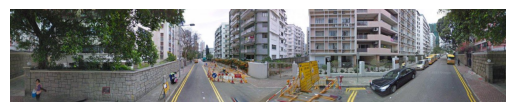

In [17]:
plt.imshow(get_img(186046))
# plt.title('GSV from original dataset')
plt.axis('off')